In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Đọc file dữ liệu

In [30]:
df=pd.read_csv('D:\Data_set\Case_study_CarPrice_Assignment.csv',encoding='ISO-8859-1')

In [31]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Tìm hiểu ý nghĩa từng thuộc tính 

In [32]:

df.info()
# 2 cột số cửa và số xylanh là kiểu str thay vì kiểu int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [33]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [34]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [35]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

# Tìm hiểu mối liên hệ giữa hãng xe và tên xe 

In [36]:
# Tách dữ liệu từ cột Carname thành hãng xe và tên xe

df['Brand']=df['CarName'].str.split(' ',expand=True)[0]

In [37]:
df['Brand']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: Brand, Length: 205, dtype: object

In [38]:
df['Brand'].unique()
# Dữ liệu bị sai 

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [39]:
# Tạo dictionary
carbrand_check={
    'maxda':'mazda',
    'Nissan':'nissan',
    'porcshce':'posrche',
    'toyouta':'toyota',
    'vw':'volkswagen',
    'vokswagen':'volkswagen'
}

In [40]:
# sửa dữ liệu bị sai
df['Brand']=df['Brand'].replace(carbrand_check)

In [41]:
df['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'posrche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Hãng xe và tên xe không có mối liên hệ nào , 1 hãng xe có nhiều loại xe , 1 loại xe có nhiều phiên bản

# Xem xét kiểu dữ các thuộc tính và chuyển đổi về đúng kiểu 

In [42]:
df[['doornumber','cylindernumber']]

,doornumber,cylindernumber
0,two,four
1,two,four
2,two,six
3,four,four
4,four,five
...,...,...
200,four,four
201,four,four
202,four,six
203,four,six


In [43]:
# Kiểm tra doornumber
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [44]:
# tạo dictionary 
door_number={
    'two':2,
    'four':4
}

In [45]:
# đổi kiểu dữ liệu cho doornumber
df['doornumber']=df['doornumber'].replace(door_number)
df['doornumber'].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_19144\578408343.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['doornumber']=df['doornumber'].replace(door_number)


0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int32

In [46]:
# Kiểm tra cylin
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [47]:
# Tạo dictionary cho cylin
cylinder_number={
    'two':2,
    'three':3,
    'four':4,
    'five':5,
    'six':6,
    'eight':8,
    'twelve':12
}

In [48]:
# Đổi kiểu dữ liệu cho cylin
df['cylindernumber']=df['cylindernumber'].replace(cylinder_number)
df['cylindernumber'].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_19144\3650567555.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cylindernumber']=df['cylindernumber'].replace(cylinder_number)


0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int32

In [49]:

df[['doornumber','cylindernumber']].head()

,doornumber,cylindernumber
0,2,4
1,2,4
2,2,6
3,4,4
4,4,5


# Phân tích mối liên hệ của từng thuộc tính với Price

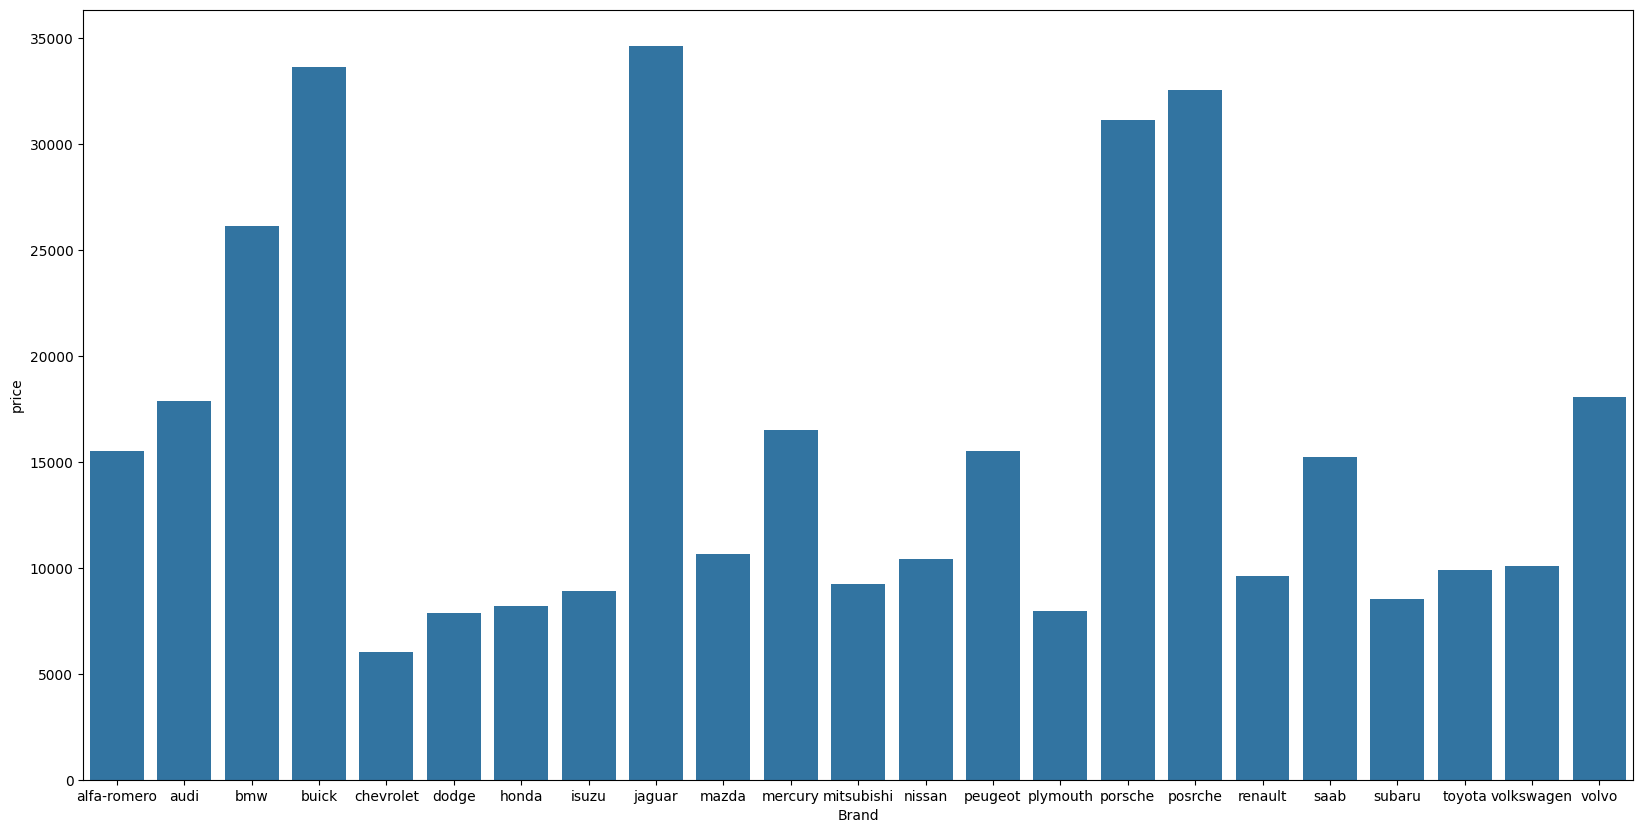

In [50]:
brand_price=df.groupby('Brand')['price'].mean().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(brand_price,x='Brand',y='price')
plt.show()

# Hầu hết các hãng xe có giá xe nằm trong khoảng từ 5000 - 20000 
# -> Xe có mức giá trung bình đến vừa thường có mức độ tiêu thụ cao

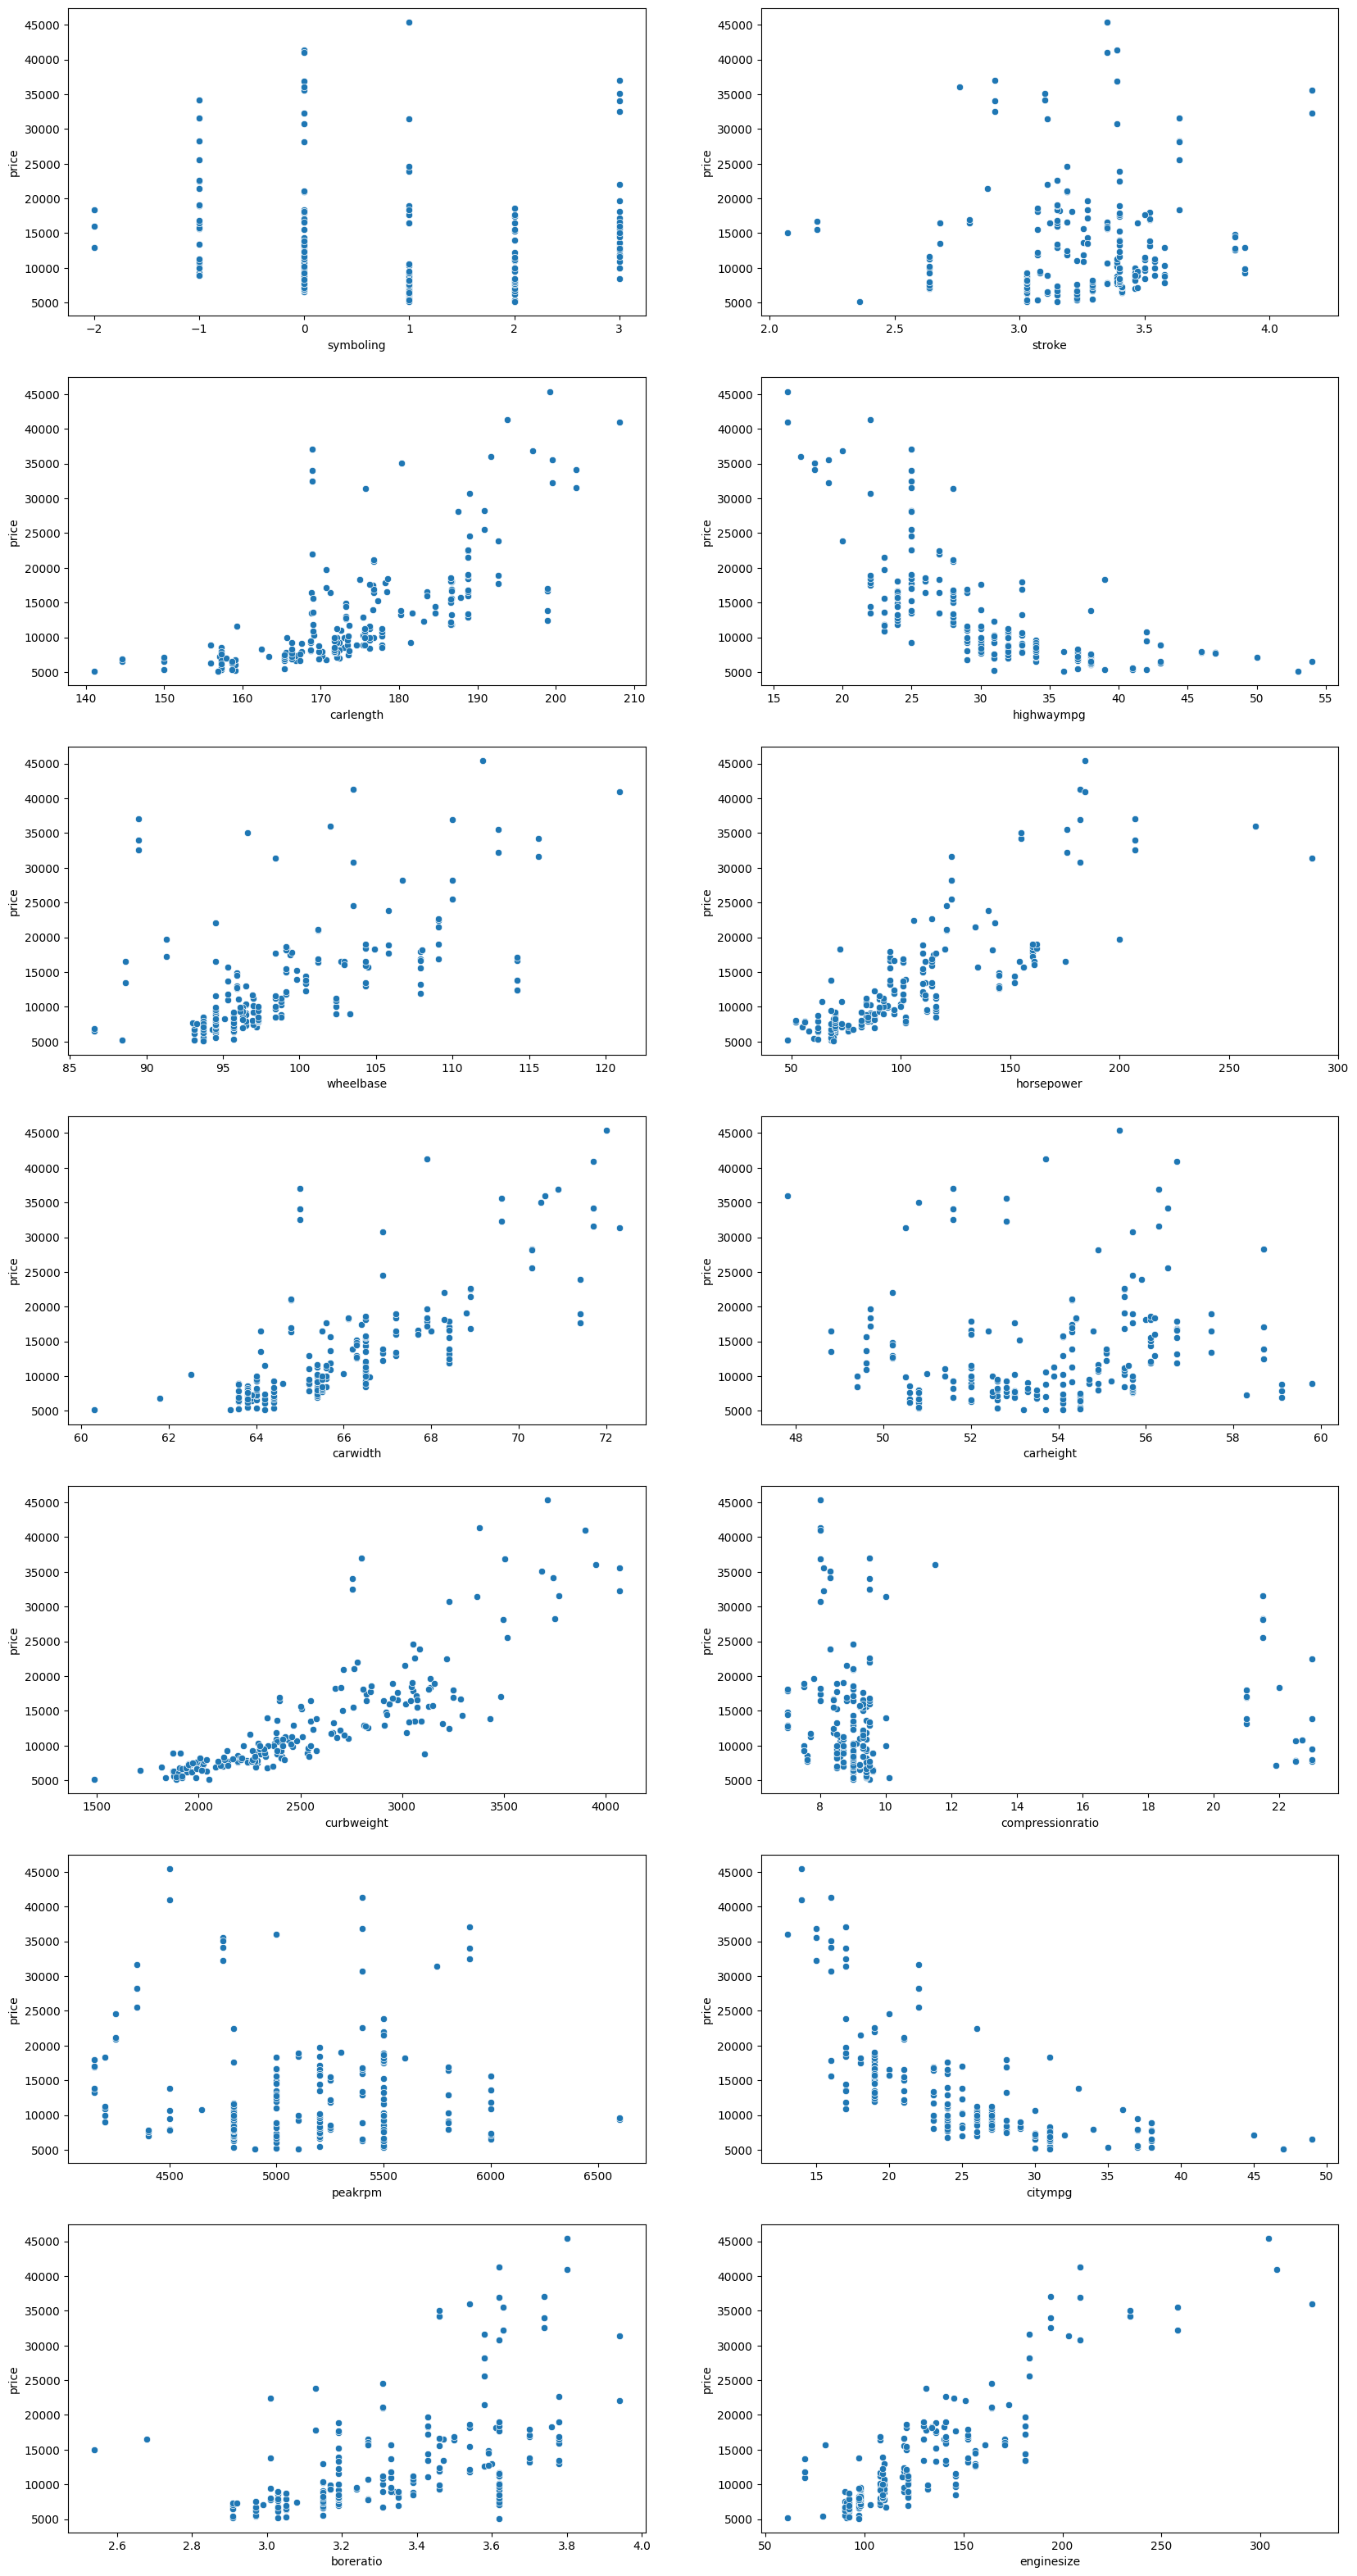

In [51]:
fix,axs=plt.subplots(7,2,figsize=(20,40))
sns.scatterplot(x='symboling',y='price',data=df,ax=axs[0][0])
sns.scatterplot(x='stroke',y='price',data=df,ax=axs[0][1])
sns.scatterplot(x='carlength',y='price',data=df,ax=axs[1][0])
sns.scatterplot(x='highwaympg',y='price',data=df,ax=axs[1][1])
sns.scatterplot(x='wheelbase',y='price',data=df,ax=axs[2][0])
sns.scatterplot(x='horsepower',y='price',data=df,ax=axs[2][1])
sns.scatterplot(x='carwidth',y='price',data=df,ax=axs[3][0])
sns.scatterplot(x='carheight',y='price',data=df,ax=axs[3][1])
sns.scatterplot(x='curbweight',y='price',data=df,ax=axs[4][0])
sns.scatterplot(x='compressionratio',y='price',data=df,ax=axs[4][1])
sns.scatterplot(x='peakrpm',y='price',data=df,ax=axs[5][0])
sns.scatterplot(x='citympg',y='price',data=df,ax=axs[5][1])
sns.scatterplot(x='boreratio',y='price',data=df,ax=axs[6][0])
sns.scatterplot(x='enginesize',y='price',data=df,ax=axs[6][1])
plt.show()


# Nhận xét các thuộc tính ảnh hưởng tới giá

In [53]:
#wheelbase
stats.pearsonr(df['wheelbase'], df['price'])
#  pvalue=1.1828204863376843e-19 <0.05 -> wheelbase có tương quan với giá

PearsonRResult(statistic=0.5778155982921502, pvalue=1.1828204863376843e-19)

In [27]:
# carlenght
stats.pearsonr(df['carlength'],df['price'])
# pvalue=1.6787066240746824e-29 <0.05 -> carlenght có tương quan với giá

PearsonRResult(statistic=0.682920015677962, pvalue=1.6787066240746824e-29)

In [28]:
# carwidth 
stats.pearsonr(df['carwidth'], df['price'])
# pvalue=9.627437876119045e-40 <0.05 -> carwidth có tương quan với giá

PearsonRResult(statistic=0.7593252997415115, pvalue=9.627437876119045e-40)

In [172]:
# hightwaympg
stats.pearsonr(df['highwaympg'], df['price'])
# pvalue=3.230681380364679e-31 <0.05 -> có  tương quan với giá

PearsonRResult(statistic=-0.6975990916465562, pvalue=3.230681380364679e-31)

In [173]:
# horsepower
stats.pearsonr(df['horsepower'],df['price'])
# pvalue=1.4834365732939108e-48 <0.05 -> có tương quan với giá

PearsonRResult(statistic=0.8081388225362217, pvalue=1.4834365732939108e-48)

In [174]:
# urbweight
stats.pearsonr(df['curbweight'],df['price'])
# pvalue=1.2144448264032194e-54 <0.05 -> có tương quan với giá

PearsonRResult(statistic=0.8353048793372967, pvalue=1.2144448264032194e-54)

In [175]:
# citympg
stats.pearsonr(df['citympg'],df['price'])
# pvalue=7.97868424966284e-30 -> có tương quan với giá

PearsonRResult(statistic=-0.68575133602704, pvalue=7.97868424966284e-30)

In [176]:
# boreratio
stats.pearsonr(df['boreratio'],df['price'])
#pvalue=7.90792227824885e-18 <0.05 -> có tương quan với giá

PearsonRResult(statistic=0.5531732367984437, pvalue=7.90792227824885e-18)

In [177]:
# enginesize 
stats.pearsonr(df['enginesize'],df['price'])
# pvalue=1.3547637598646555e-65 <0.05 -> có tương quan với giá

PearsonRResult(statistic=0.8741448025245118, pvalue=1.3547637598646555e-65)

In [178]:
# Các thuộc tính symbleling ,stroke, carheight không có sự tương quan về giá

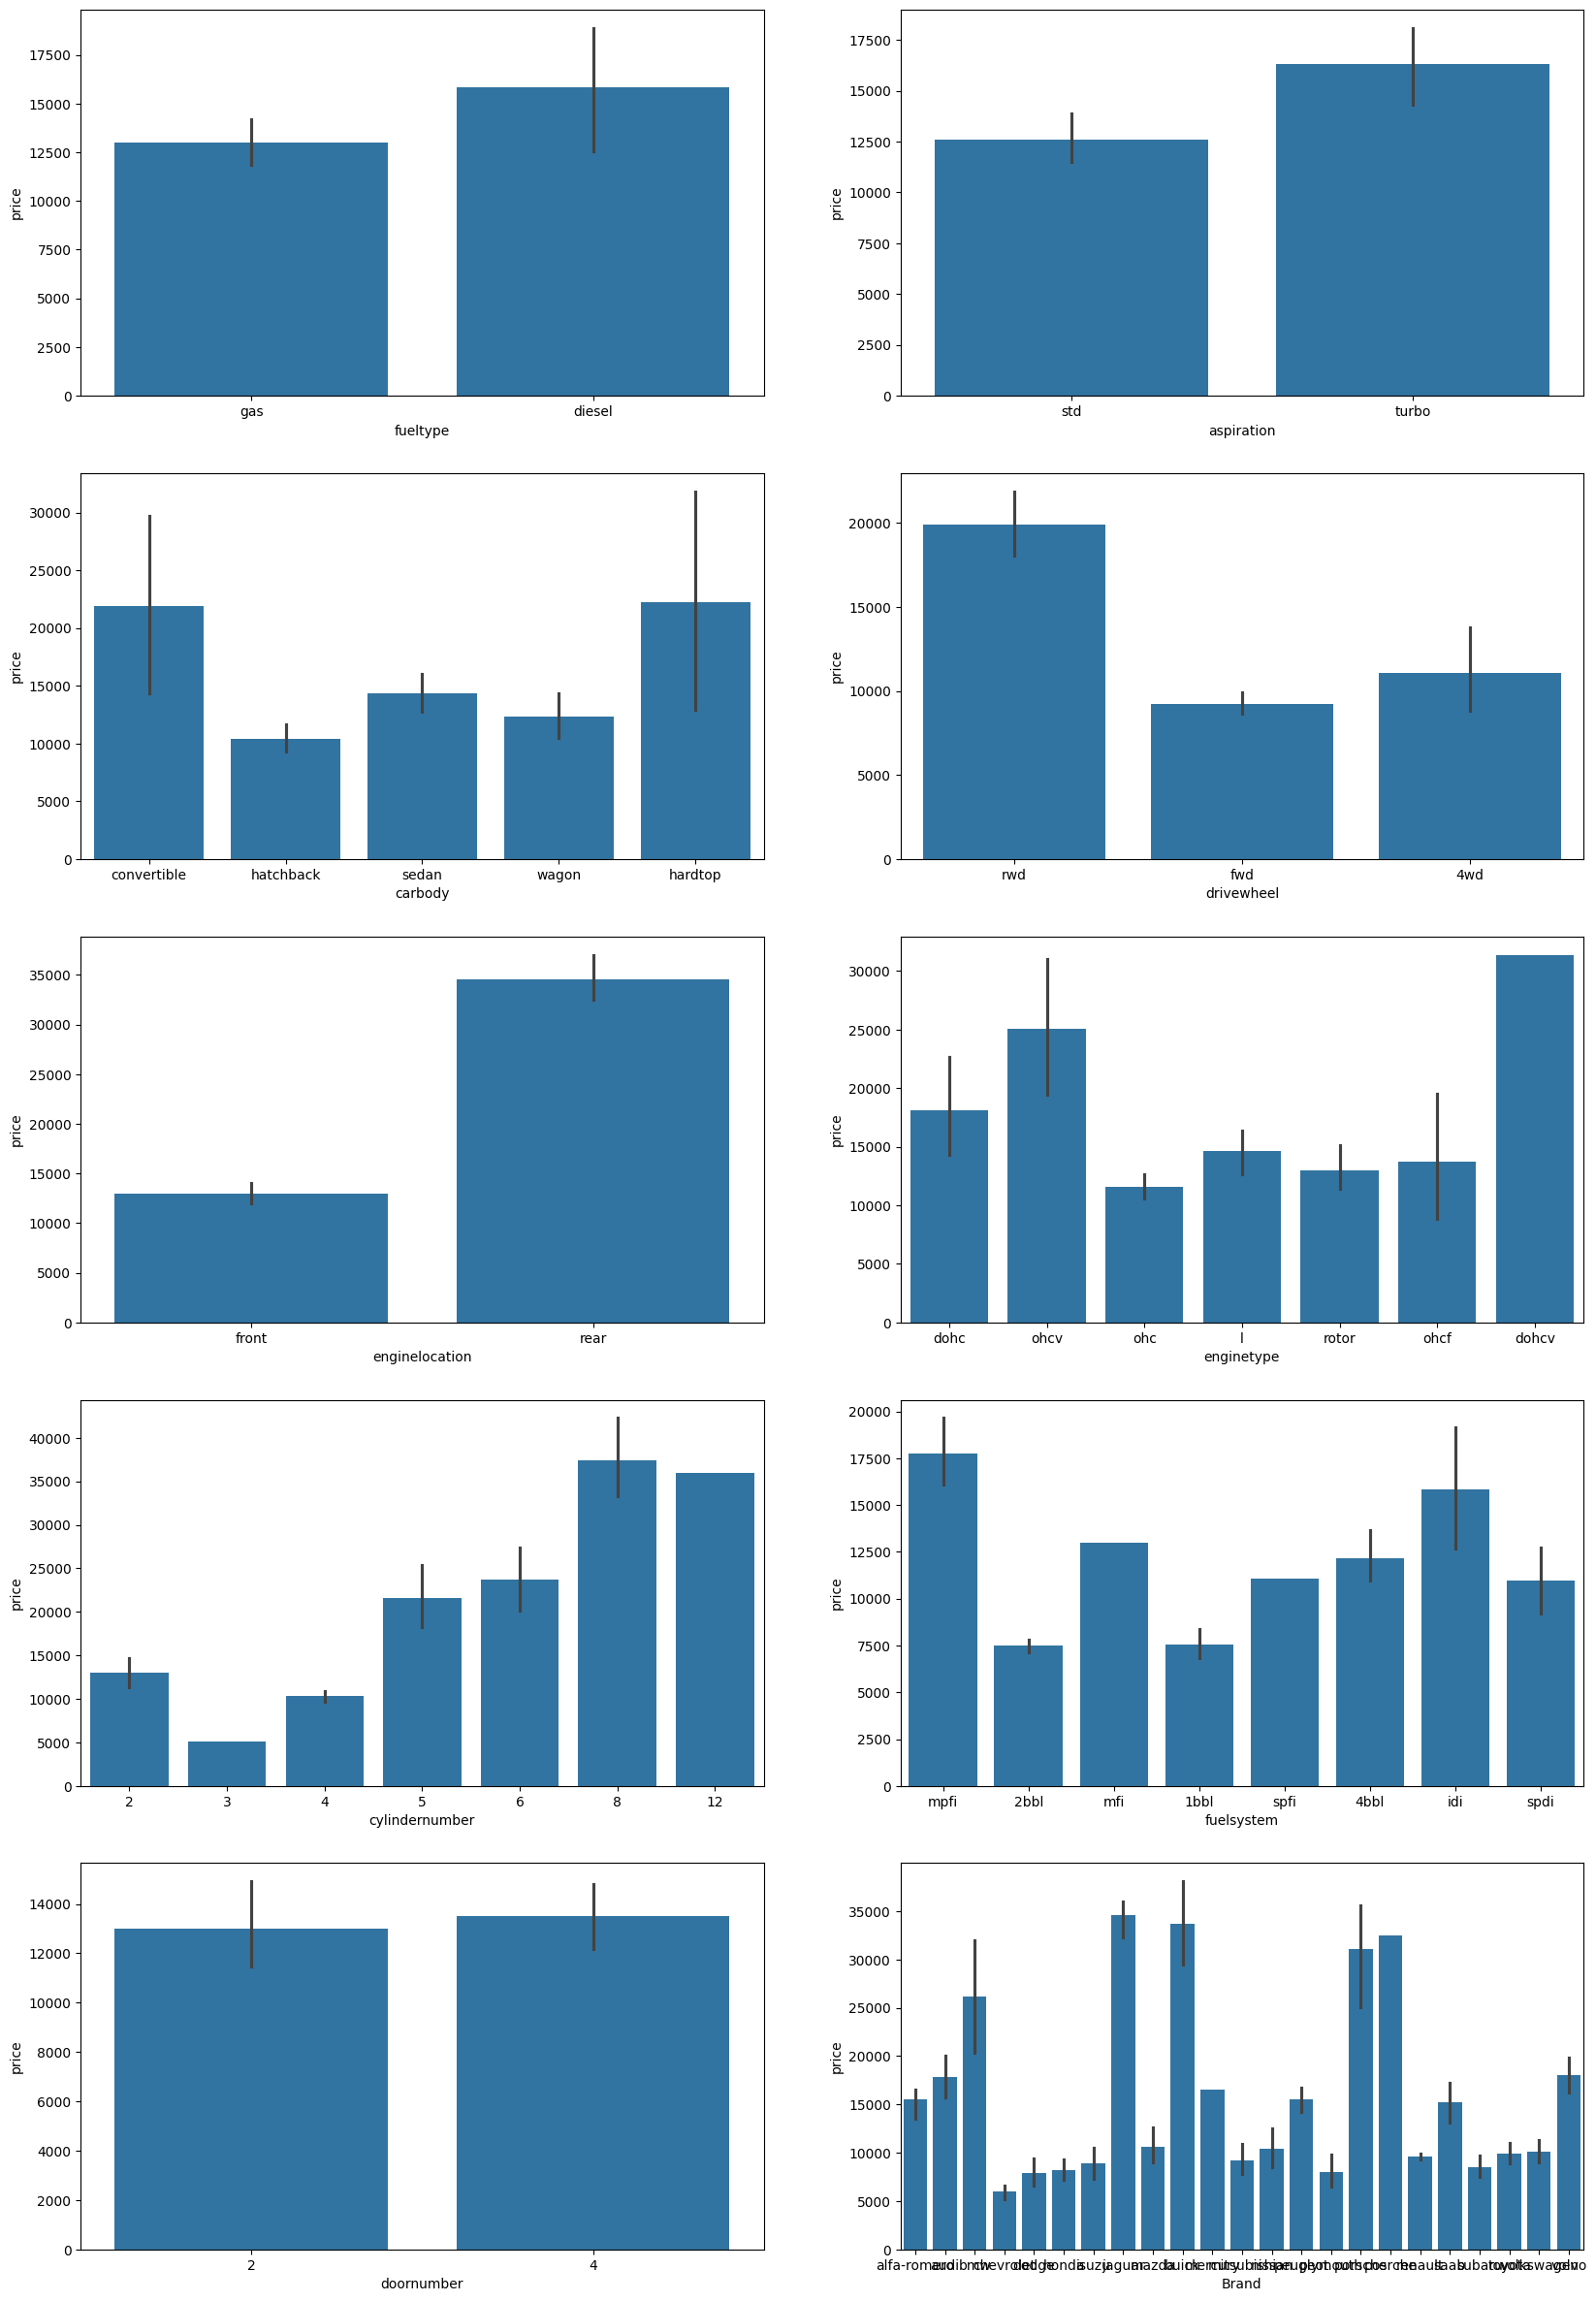

In [54]:
fig, axs = plt.subplots(5, 2, figsize=(20,30))
sns.barplot(x='fueltype', y='price', data=df, ax=axs[0][0])
sns.barplot(x='aspiration', y='price', data=df, ax=axs[0][1])
sns.barplot(x='carbody', y='price', data=df, ax=axs[1][0])
sns.barplot(x='drivewheel', y='price', data=df, ax=axs[1][1])
sns.barplot(x='enginelocation', y='price', data=df, ax=axs[2][0])
sns.barplot(x='enginetype', y='price', data=df, ax=axs[2][1])
sns.barplot(x='cylindernumber', y='price', data=df, ax=axs[3][0])
sns.barplot(x='fuelsystem', y='price', data=df, ax=axs[3][1])
sns.barplot(x='doornumber',y='price',data=df,ax=axs[4][0])
sns.barplot(x='Brand',y='price',data=df,ax=axs[4][1])
plt.show()

# Vẽ biểu đồ Heatmap kiểm tra tương quan giữa các biến

In [55]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Brand'],
      dtype='object')

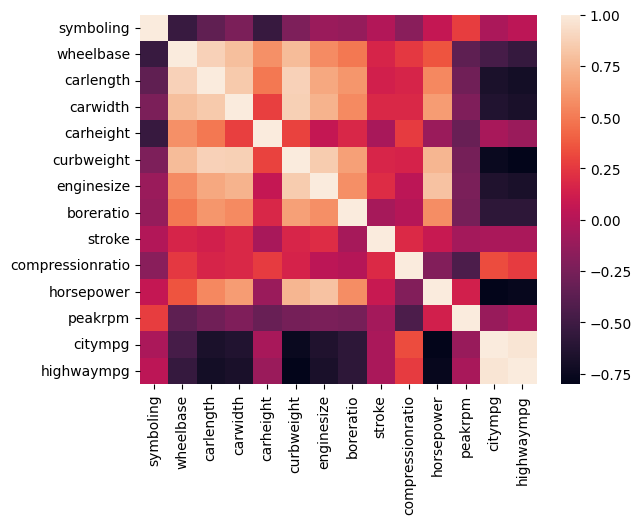

In [56]:

sns.heatmap(df[['symboling',
                'wheelbase',
                'carlength',
                'carwidth',
                'carheight',
                'curbweight',
                'enginesize',
                'boreratio',
                'stroke',
                'compressionratio',
                'horsepower',
                'peakrpm',
                'citympg',
                'highwaympg']].corr())
plt.show()

In [57]:
df1=df[['symboling',
        'wheelbase',
        'carlength',
        'carwidth',
        'carheight',
        'curbweight',
        'enginesize',
        'boreratio',
        'stroke',
        'compressionratio',
        'horsepower',
        'peakrpm',
        'citympg',
        'highwaympg']].corr()

In [34]:
df1

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201


In [58]:
# Lọc dữ liệu 
test_heat=df1[(df1>0.8)&(df1<1)]

In [59]:
test_heat

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,NaN,NaN,0.874587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carlength,NaN,0.874587,NaN,0.841118,NaN,0.877728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carwidth,NaN,NaN,0.841118,NaN,NaN,0.867032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carheight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curbweight,NaN,NaN,0.877728,0.867032,NaN,NaN,0.850594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginesize,NaN,NaN,NaN,NaN,NaN,0.850594,NaN,NaN,NaN,NaN,0.809769,NaN,NaN,NaN
boreratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compressionratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [61]:
# wheelbase vs carlength
x=df[['wheelbase','carlength']]
y=df['price']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [63]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     69.53
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           1.71e-22
Time:                        17:07:46   Log-Likelihood:                -1661.8
No. Observations:                 164   AIC:                             3330.
Df Residuals:                     161   BIC:                             3339.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.157e+04   7824.324     -7.869      0.000    -7.7e+04   -4.61e+04
wheelbase   -224.7131    163.714     -1.373      0.172    -548.017      98.591
carlength    558.4561     81.603      6.844      0.000     397.305     719.607
==============================================================================
Omnibus:                       62.731   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.950
Skew:                           1.680   Prob(JB):                     4.53e-33
Kurtosis:                       6.242   Cond. No.                     3.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# ->  Giữ carlength bỏ wheelbase

In [64]:
# carwidth vs carlength vs curbweight
x=df[['carwidth','carlength','curbweight']]
y=df['price']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [66]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     126.5
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           5.05e-42
Time:                        17:07:53   Log-Likelihood:                -1613.2
No. Observations:                 164   AIC:                             3234.
Df Residuals:                     160   BIC:                             3247.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.984e+04   1.79e+04     -2.780      0.006   -8.52e+04   -1.44e+04
carwidth     961.6662    339.680      2.831      0.005     290.832    1632.500
carlength   -200.8485     65.230     -3.079      0.002    -329.671     -72.026
curbweight    13.6198      1.612      8.451      0.000      10.437      16.802
==============================================================================
Omnibus:                       77.813   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.700
Skew:                           1.806   Prob(JB):                     1.70e-69
Kurtosis:                       8.771   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# -> giữ carwidth bỏ carlegth và curbweight

In [67]:
#curbweight vs enginesize
x=df[['curbweight','enginesize']]
y=df['price']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [69]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     293.4
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           2.02e-54
Time:                        17:07:59   Log-Likelihood:                -1586.9
No. Observations:                 164   AIC:                             3180.
Df Residuals:                     161   BIC:                             3189.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.424e+04   1673.680     -8.506      0.000   -1.75e+04   -1.09e+04
curbweight     4.9911      1.083      4.609      0.000       2.852       7.130
enginesize   117.1137     13.212      8.864      0.000      91.023     143.205
==============================================================================
Omnibus:                       26.426   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.884
Skew:                           0.797   Prob(JB):                     1.09e-10
Kurtosis:                       5.044   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# -> giữ enginesize bỏ curbweight 

In [70]:
#horsepower vs enginesize
x=df[['horsepower','enginesize']]
y=df['price']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [72]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     299.3
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           5.75e-55
Time:                        17:08:05   Log-Likelihood:                -1585.7
No. Observations:                 164   AIC:                             3177.
Df Residuals:                     161   BIC:                             3187.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8392.8482    964.054     -8.706      0.000   -1.03e+04   -6489.026
horsepower    60.9564     12.414      4.910      0.000      36.440      85.473
enginesize   121.8356     11.823     10.305      0.000      98.488     145.183
==============================================================================
Omnibus:                        6.375   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                7.912
Skew:                           0.248   Prob(JB):                       0.0191
Kurtosis:                       3.954   Cond. No.                         566.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# -> giữ enginesize bỏ horsepower

In [73]:
#highwaympg vs citympg
x=df[['highwaympg','citympg']]
y=df['price']

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [75]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     78.04
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           2.02e-24
Time:                        17:08:10   Log-Likelihood:                -1657.3
No. Observations:                 164   AIC:                             3321.
Df Residuals:                     161   BIC:                             3330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.955e+04   2344.548     16.868      0.000    3.49e+04    4.42e+04
highwaympg  -943.5843    301.082     -3.134      0.002   -1538.163    -349.006
citympg      122.5037    314.635      0.389      0.698    -498.841     743.848
==============================================================================
Omnibus:                       43.843   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.597
Skew:                           1.403   Prob(JB):                     4.68e-16
Kurtosis:                       4.568   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# -> giữ citympg bỏ highwaympg

# Chuyển đổi các category thành các biến dummies

In [76]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Brand'],
      dtype='object')

In [77]:
df1 = pd.get_dummies(df.drop(['price','symboling','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower', 'peakrpm', 'citympg','car_ID','doornumber'], axis=1),
                     columns=['CarName','fueltype','aspiration',
                              'carbody','drivewheel','enginelocation',
                              'enginetype','fuelsystem','Brand'],
                     dtype='int')

In [78]:
df1

,cylindernumber,enginesize,highwaympg,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,...,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_posrche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,4,130,27,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,130,27,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,152,26,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,109,30,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,136,22,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,141,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,4,141,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,6,173,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,6,145,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn

In [79]:
# chỉ định biến
x=df1
y=df['price']

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [81]:
len(x_train)

164

In [297]:
len(x_test)

41

In [82]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [83]:
coef = model.coef_
intercept = model.intercept_

In [84]:
coef

array([-3.27194945e+02,  1.02694529e+02,  3.73682043e+01, -1.57338713e+03,
       -5.42399903e-10, -2.03724935e+03,  9.67750650e+02,  4.60232741e-10,
       -1.18099271e+03,  5.03659706e+03,  1.66729450e+03, -1.02585358e+03,
       -2.61488302e+03, -4.80426519e+03, -4.01541911e-10,  5.76929113e+03,
       -4.25445282e+02,  1.01295547e+04,  1.74168235e-10,  3.09546665e+03,
        1.58157708e+03, -1.58522623e+03, -1.72660044e+03, -8.36567505e+02,
        5.46361898e+03,  4.32139956e+03, -2.15739687e+02, -4.88853402e-11,
       -9.34344821e+02, -1.56067789e+03,  1.19669619e+02,  4.45336548e+02,
       -1.14823706e-11, -2.43000209e+03, -2.04636308e-11,  9.54969437e-12,
       -6.17765218e+02,  2.27373675e-11, -7.97434994e+02,  3.12695746e+02,
        1.09955956e+01, -2.18278728e-11, -4.34644827e+02, -1.51885499e+03,
        7.65862281e+02,  4.82840047e+02,  3.99259187e+02, -3.90470789e+02,
        1.07255703e+03,  1.90993887e-11, -2.01393799e+03,  3.58502692e+03,
        2.85026923e+02, -

In [85]:
intercept

7985.108911467154

In [86]:
y_pred = model.predict(x_test)
y_pred

array([ 7163.66345181, 14502.4893568 ,  9322.25668454, 16925.        ,
       16871.09350642,  7285.6788323 , 11417.07612208,  8608.08922315,
        7370.58615036, 10679.82328018, 14374.5727903 ,  7273.97108833,
       10933.21532316, 32557.69183742, 11263.66692966,  7072.38713459,
        4138.18464375,  7424.33747477, 34908.19550839,  6257.33038147,
       10081.66901596,  9689.31964565, 16683.89031   , 26788.40071055,
        8845.        ,  7458.71709573,  7066.79896863, 12251.77177452,
       12525.330473  , 15479.19148129, 11982.47510099, 15606.16670743,
        5459.89538724, 26676.29609779, 10761.87667846, 18354.09287925,
       13441.77373366, 15340.61059334,  8745.47410045,  7370.58615036,
       14053.95125588])

In [87]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [88]:
mse

11603632.413831621

In [89]:
mae

2276.0280242371628

In [90]:
rmse

3406.4104881578237

In [91]:
r2

0.6711341986118105

In [92]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [ ]:
# Chênh lệch giữa mean price  13276.710571 và 2276.0280242371628 sai số khoảng 17%